# Simple analytics

In [4]:
from aux import connect_to_db
from sql_queries import (
    AVG_POINTS_BY_PLAYER_QUERY, COUNT_GAMES_PER_TOURNAMENT_QUERY, 
    WINS_PER_SURFACE_QUERY, CURRENT_PRE_MATCH_ATP_RANKINGS_QUERY,
    LAST_X_MATCHES
)

In [2]:
def execute_and_print_query(query, row_limit=10):
    conn = connect_to_db()
    if conn is None:
        return

    try:
        cur = conn.cursor()
        cur.execute(query)

        # Fetch all results
        results = cur.fetchall()

        # Print top rows up to the specified limit
        for idx, row in enumerate(results[:row_limit]):
            print(f"Row {idx + 1}: {row}")

        cur.close()
        conn.close()
        print("Database connection closed.")
    except Exception as e:
        print(f"Error during DB operation: {e}")

In [3]:
execute_and_print_query(AVG_POINTS_BY_PLAYER_QUERY, row_limit=5)

Error connecting to database: could not translate host name "db" to address: Name or service not known



In [5]:
execute_and_print_query(COUNT_GAMES_PER_TOURNAMENT_QUERY, row_limit=10)

Connection to database established.
Row 1: (32, 'French Open', 127)
Row 2: (39, 'Wimbledon', 127)
Row 3: (5, 'Australian Open', 127)
Row 4: (51, 'US Open', 127)
Row 5: (28, 'Mutua Madrid Open', 95)
Row 6: (29, "Internazionali BNL d'Italia", 95)
Row 7: (20, 'Miami Open', 95)
Row 8: (19, 'BNP Paribas Open', 95)
Row 9: (49, 'Western & Southern Financial Group Masters', 55)
Row 10: (48, 'Canadian Open', 55)
Database connection closed.


In [6]:
execute_and_print_query(CURRENT_PRE_MATCH_ATP_RANKINGS_QUERY, row_limit=10)

Connection to database established.
Row 1: (53, 'Sinner J.', 1, 9360)
Row 2: (60, 'Djokovic N.', 2, 7460)
Row 3: (86, 'Alcaraz C.', 3, 7360)
Row 4: (85, 'Zverev A.', 4, 7035)
Row 5: (63, 'Medvedev D.', 5, 6275)
Row 6: (30, 'Rublev A.', 6, 4805)
Row 7: (76, 'Hurkacz H.', 7, 4055)
Row 8: (82, 'Ruud C.', 8, 3855)
Row 9: (5, 'Dimitrov G.', 9, 3655)
Row 10: (75, 'De Minaur A.', 10, 3435)
Database connection closed.


In [7]:
execute_and_print_query(WINS_PER_SURFACE_QUERY, row_limit=10)

Connection to database established.
Row 1: (53, 'Sinner J.', 'Hard', 36)
Row 2: (30, 'Rublev A.', 'Hard', 26)
Row 3: (11, 'Thompson J.', 'Hard', 25)
Row 4: (5, 'Dimitrov G.', 'Hard', 25)
Row 5: (56, 'Baez S.', 'Clay', 23)
Row 6: (85, 'Zverev A.', 'Hard', 23)
Row 7: (82, 'Ruud C.', 'Clay', 22)
Row 8: (63, 'Medvedev D.', 'Hard', 22)
Row 9: (101, 'Darderi L.', 'Clay', 21)
Row 10: (29, 'Tiafoe F.', 'Hard', 21)
Database connection closed.


In [5]:
execute_and_print_query(LAST_X_MATCHES, row_limit=10)

Error connecting to database: could not translate host name "db" to address: Name or service not known



In [16]:
execute_and_print_query("""
                        SELECT
                        --m.match_id,
                        --m.tournament_id,
                        m.date,
                        m.round,
                        --m.best_of,
                        w.name AS winner_name,
                        l.name AS loser_name,
                        m.winner_rank,
                        m.loser_rank,
                        m.winner_pts,
                        m.loser_pts,
                        m.winner_sets,
                        m.loser_sets,
                        m.comments
                        FROM matches m
                        JOIN players w ON m.winner_id = w.player_id
                        JOIN players l ON m.loser_id = l.player_id
                        ORDER BY m.date DESC
                        LIMIT 10
                        """, row_limit=5)

Connection to database established.
Row 1: (datetime.date(2024, 9, 8), 'The Final', 'Sinner J.', 'Fritz T.', 1, 12, 9360, 3120, 3, 0, 'Completed')
Row 2: (datetime.date(2024, 9, 7), 'Semifinals', 'Fritz T.', 'Tiafoe F.', 12, 20, 3120, 2120, 3, 2, 'Completed')
Row 3: (datetime.date(2024, 9, 6), 'Semifinals', 'Sinner J.', 'Draper J.', 1, 25, 9360, 1695, 3, 0, 'Completed')
Row 4: (datetime.date(2024, 9, 5), 'Quarterfinals', 'Sinner J.', 'Medvedev D.', 1, 5, 9360, 6275, 3, 1, 'Completed')
Row 5: (datetime.date(2024, 9, 4), 'Quarterfinals', 'Tiafoe F.', 'Dimitrov G.', 20, 9, 2120, 3655, 2, 1, 'Retired')
Database connection closed.


# 2 Part Quick Checks

In [37]:
from etl import extract_data_from_excel
from typing import Optional
from enum import Enum, auto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
def plot_running_total_with_initial_value(df, initial_value=100, title='Running Total Over Bets'):
    """
    Plots the running total with the initial value represented as a dashed line.
    
    Parameters:
    - df: pandas DataFrame containing the 'running_total' column.
    - initial_value: float, the initial value to be represented as a dashed line (default is 100).
    - title: str, title of the plot (default is 'Running Total Over Bets').
    """
    # Create a copy of the original DataFrame and extract the 'running_total' series
    df_s = df.copy()
    df_s = df_s["running_total"]

    # Create a new Series that includes the initial value at the start
    df_c = pd.Series([initial_value] + df_s.tolist())

    # Plot the running total with markers
    plt.figure(figsize=(30, 8))
    sns.lineplot(data=df_c, marker='o', label='Running Total')

    # Add a horizontal dashed line for the initial value
    plt.axhline(y=initial_value, color='red', linestyle='--', label='Initial Value')

    # Customize the plot
    plt.title(title)
    plt.xlabel('Bet Number')
    plt.ylabel('Running Total')
    #plt.xticks(range(len(df_c)))  # Set x-ticks to match the bet numbers
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

In [18]:
URL = "http://tennis-data.co.uk/2024/20234.xlsx"
df = extract_data_from_excel(URL)
df.sort_values("Date", inplace=True)
df.reset_index(drop=True, inplace=True)
df.tail(3)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Lsets,Comment,B365W,B365L,PSW,PSL,MaxW,MaxL,AvgW,AvgL
2338,54,Beijing,China Open,2024-10-01,ATP500,Outdoor,Hard,Semifinals,3,Alcaraz C.,...,0.0,Completed,1.25,4.00,1.30,3.94,1.30,4.00,1.27,3.72
2339,55,Tokyo,Japan Open Tennis Championships,2024-10-01,ATP500,Outdoor,Hard,The Final,3,Fils A.,...,1.0,Completed,2.38,1.57,2.33,1.68,2.50,1.68,2.33,1.59
2340,54,Beijing,China Open,2024-10-02,ATP500,Outdoor,Hard,The Final,3,Alcaraz C.,...,1.0,Completed,1.73,2.10,1.85,2.07,1.85,2.23,1.74,2.08


In [164]:
df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [3]:
# Quick Check using the lowest Odd Strategy
player = "Sinner J."
print(f"{player = }")
df_t = df.copy()
df_t['bet_correct'] = df['AvgW'] < df['AvgL']
df_t["bet_correct"].value_counts(normalize=True)

player = 'Sinner J.'


bet_correct
True     0.68176
False    0.31824
Name: proportion, dtype: float64

In [4]:
class BetResult(Enum):
    """Result of the bet"""

    WIN = auto()
    LOSE = auto()

In [139]:
def bet_on_smaller_odd(player_A: str, player_B: str, odd_A: str, odd_B: str) -> Optional[str]:
    if odd_A < odd_B:
        return player_A
    elif odd_A > odd_B:
        return player_B
    else: 
        return None

In [140]:
def bet_on_smaller_odd_criteria(player_A: str, player_B: str, odd_A: str, odd_B: str) -> Optional[str]:
    if (odd_A <= 1.2) or (odd_B <= 1.2):
        return None
    if odd_A < odd_B:
        return player_A
    elif odd_A > odd_B:
        return player_B
    else: 
        return None

In [141]:
def evaluate_bet(winner: str, bet_decision: str) -> BetResult:
    if winner == bet_decision:
        return BetResult.WIN
    else:
        return BetResult.LOSE

In [185]:
def settleBet(bet_result: BetResult, bet_amount: float, winner_odd: float) -> float:
    if bet_result == BetResult.WIN:
        return (bet_amount * winner_odd) - bet_amount
    else:
        return - bet_amount

In [186]:
def simulate_bets(df, INITIAL_VALUE, BET_AMOUNT, strategy=bet_on_smaller_odd):
    results = list()
    running_total = INITIAL_VALUE

    for _, match in df.iterrows():
        #print(f"{match["Winner"] = }")
        intersting_columns = [x for x in df.columns if x not in ('ATP', 'Location', 'Tournament','Series', 'Court', 'Surface',
       'Best of', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'PSW', 'PSL', 'MaxW', 'MaxL')]
        match_dict = {col: match[col] for col in intersting_columns}
        
        # Select Strategy
        strategy = strategy

        # Bet Decision (The one I think will win)
        bet_decision = strategy(match["Winner"], match["Loser"], match["AvgW"], match["AvgL"])
        #print(f"{bet_decision = }")
        if not bet_decision:
            #print(f"Skipping for {match_dict}")
            continue


        # Evaluate Bet
        bet_result = evaluate_bet(winner=match["Winner"], bet_decision=bet_decision)
        #print(f"{bet_result = }") 

        # Settling
        netResult = settleBet(bet_result= bet_result, bet_amount= BET_AMOUNT, winner_odd= match["AvgW"])
        #print(f"{match["AvgW"] = }")
        #print(f"{match["AvgL"] = }")
        #print(f"{netResult = }")

        # Add new values to the dictionary
        match_dict['bet_decision'] = bet_decision
        match_dict['bet_result'] = bet_result
        match_dict['netResult'] = netResult
        running_total += netResult
        match_dict['running_total'] = running_total

        results.append(match_dict)
        
    return results

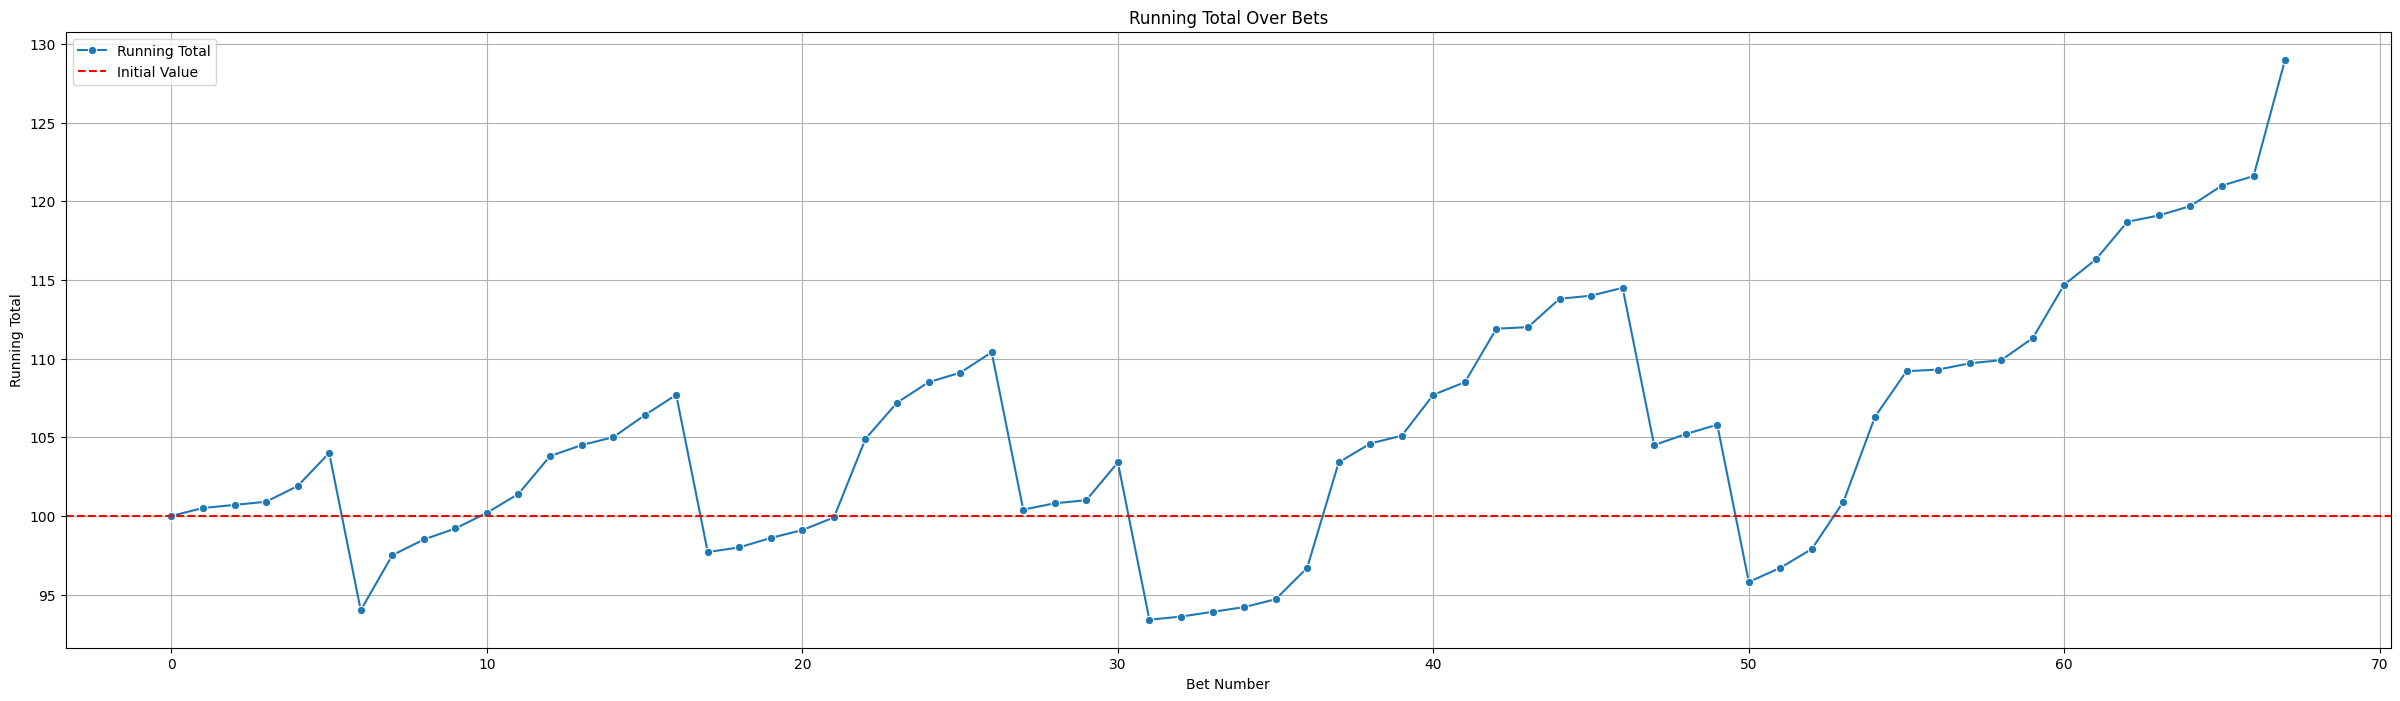

In [191]:
# Strategy 1
INITIAL_VALUE = 100
BET_AMOUNT = 10
player = "Sinner J."

df_player = df[
    (df["Winner"] == player) | (df["Loser"] == player)
]

res = simulate_bets(df_player, INITIAL_VALUE, BET_AMOUNT)
df_r = pd.DataFrame.from_dict(res)
plot_running_total_with_initial_value(df_r)

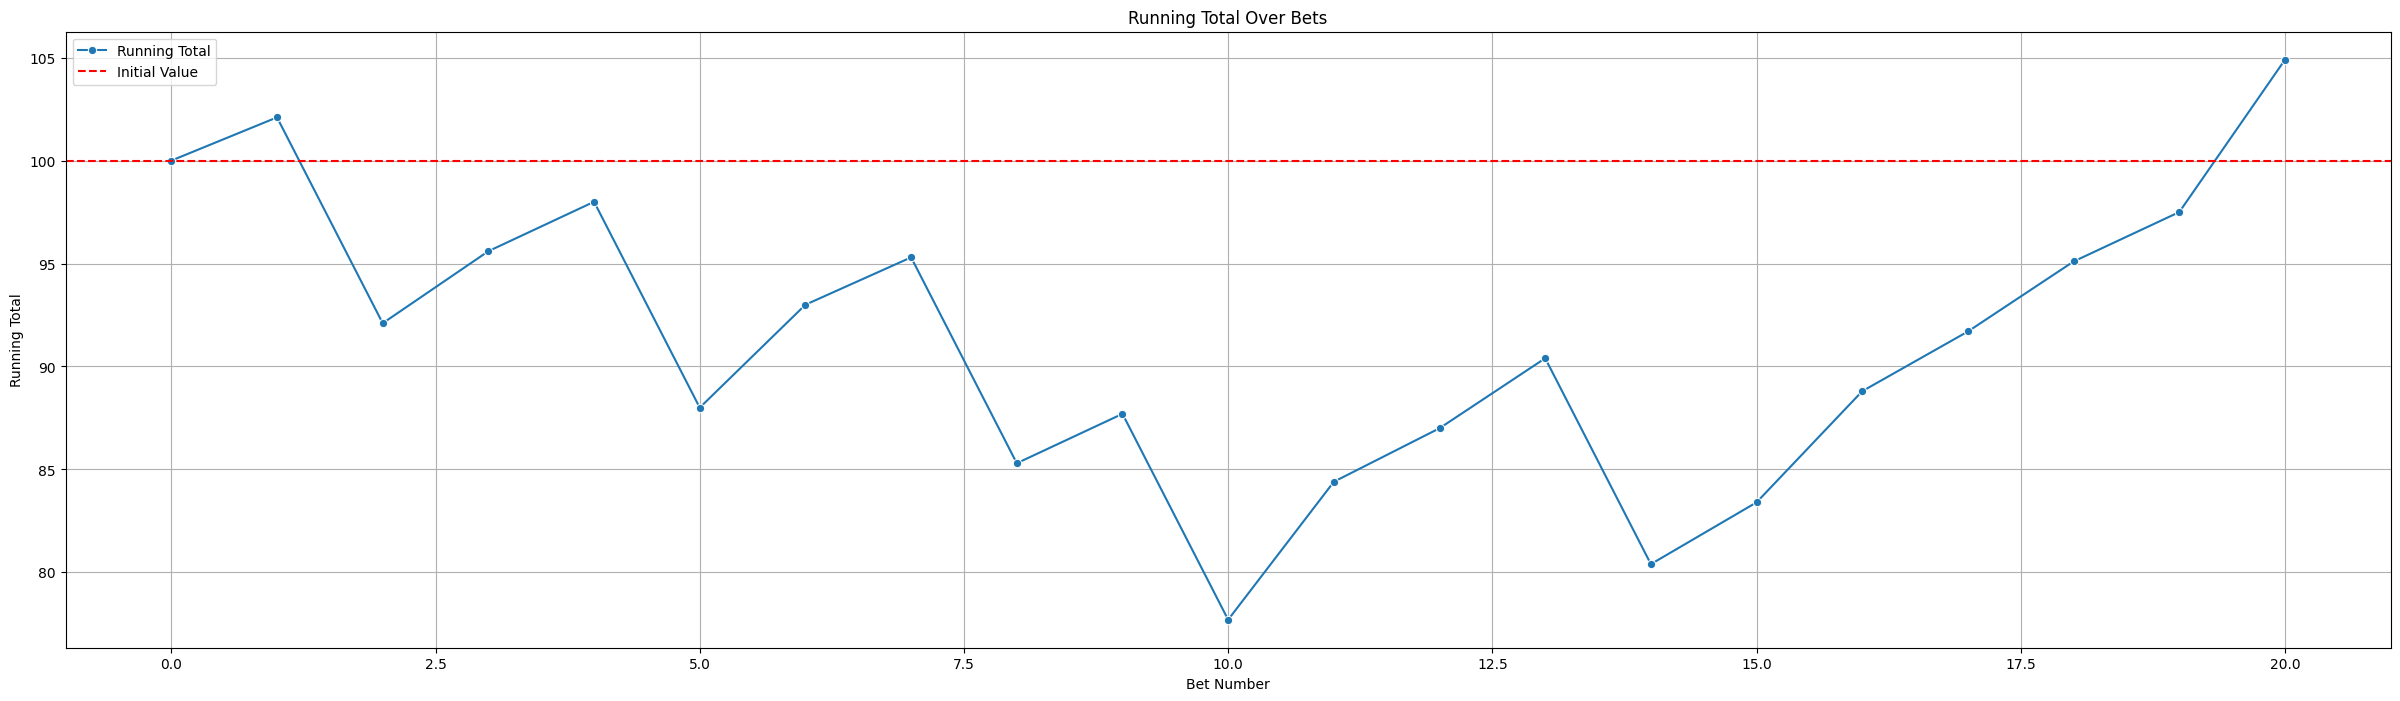

In [193]:
# Strategy 2 - Same as 1 but with the condition of not possible when less than 1.2
res = simulate_bets(df_player, INITIAL_VALUE, BET_AMOUNT, strategy=bet_on_smaller_odd_criteria)
df_r = pd.DataFrame.from_dict(res)
plot_running_total_with_initial_value(df_r)

In [ ]:
# Check which player would be wiser to bet on using this strategy